In [1]:
import pandas
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('A4_kcao335').getOrCreate()
import matplotlib.pyplot as plt
import numpy as np

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/16 03:49:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('./NAHeartattack31.csv', header=True, inferSchema=True)

df['age_days','age_year','gender','height','weight'
].describe().show()

df['ap_hi','ap_lo','cholesterol','gluc'
].describe().show()


df['smoke','alco','active','cardio'
].describe().show()

df.printSchema()



df.groupBy('age_year').count().show()






dfnoNA = df.filter(df.age_year!='NA')
dfnoNA.show()
print((dfnoNA.count(), len(dfnoNA.columns)))


#drop useless column

dfnoNAcol=dfnoNA.drop("age_days","_c0","id")
print((dfnoNAcol.count(), len(dfnoNAcol.columns)))
dfnoNAcol.show()




# Using this syntax, we can drop any row with missing data. Three rows are dropped.
#df.na.drop().show()
# Requires a certain amount of non-null values. Row two was dropped, as there's only one non-null value.
#df.na.drop(thresh=2).show()

# Drops a row if all values are missing. Zero rows are dropped. 
#df.na.drop(how="all").show()

# Drops a row if a value from a particular row is missing. Two rows are dropped.
#df.na.drop(subset="Sales").show()
# Instead of dropping the row, this fills null string types with FILL VALUE. 
#df.na.fill("FILL VALUE").show()

# Spark will only apply numbers to number data types, and strings to string data types.
#df.na.fill(0).show()

# However, it's good practice to specify the row you want to fill using subset. 
#df.na.fill('FILL NAME', subset=['Name']).show()

+-------+------------------+------------------+-------------------+------------------+------------------+
|summary|          age_days|          age_year|             gender|            height|            weight|
+-------+------------------+------------------+-------------------+------------------+------------------+
|  count|             70000|             70000|              70000|             70000|             70000|
|   mean|19468.865814285713| 53.49102910016616| 1.3495714285714286|164.35922857142856|          74.20569|
| stddev| 2467.251667241397|39.416848448669924|0.47683801558286265| 8.210126364538075|14.395756678511347|
|    min|             10798|                30|                  1|                55|              10.0|
|    max|             23713|                NA|                  2|               250|             200.0|
+-------+------------------+------------------+-------------------+------------------+------------------+

+-------+-----------------+------------------

22/10/16 03:49:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, age_days, age_year, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
 Schema: _c0, id, age_days, age_year, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/NAHeartattack31.csv


+---+---+--------+--------+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|_c0| id|age_days|age_year|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+--------+--------+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  1|  0|   18393|      50|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  2|  1|   20228|      55|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  3|  2|   18857|      52|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  4|  3|   17623|      48|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  6|  8|   21914|      60|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  8| 12|   22584|      62|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
|  9| 13|   17668|      48|     1|   158|  71.0|  110|   70|          1| 

22/10/16 05:02:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, age_days, age_year, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
 Schema: _c0, id, age_days, age_year, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/NAHeartattack31.csv


0        50
1        55
2        52
3        48
4        60
         ..
65596    53
65597    62
65598    52
65599    61
65600    56
Name: age_year, Length: 65600, dtype: int64


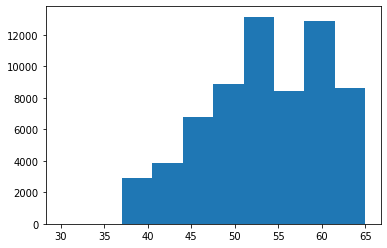

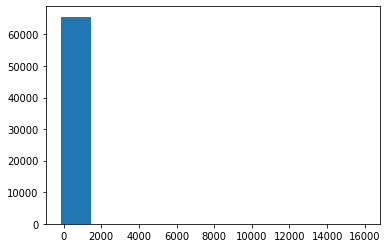

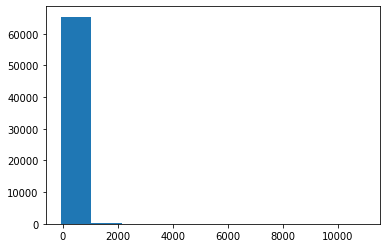

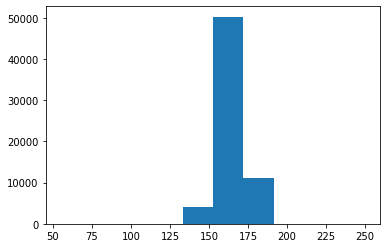

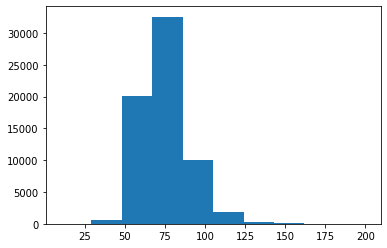

         _c0     id  age_days  age_year  gender  height  weight  ap_hi  ap_lo  \
0          1      0     18393        50       2     168    62.0    110     80   
1          2      1     20228        55       1     156    85.0    140     90   
2          3      2     18857        52       1     165    64.0    130     70   
3          4      3     17623        48       2     169    82.0    150    100   
4          6      8     21914        60       1     151    67.0    120     80   
...      ...    ...       ...       ...     ...     ...     ...    ...    ...   
65594  69994  99991     19699        54       1     172    70.0    130     90   
65595  69995  99992     21074        58       1     165    80.0    150     80   
65596  69996  99993     19240        53       2     168    76.0    120     80   
65599  69999  99998     22431        61       1     163    72.0    135     80   
65600  70000  99999     20540        56       1     170    72.0    120     80   

       cholesterol  gluc  s

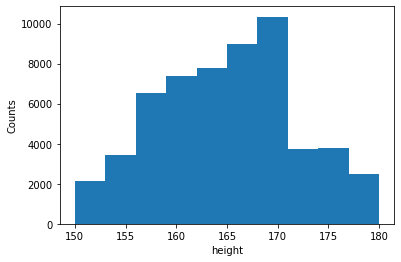

count    56640.000000
mean       164.526924
std          6.842841
min        150.000000
25%        160.000000
50%        165.000000
75%        169.000000
max        180.000000
Name: height, dtype: float64


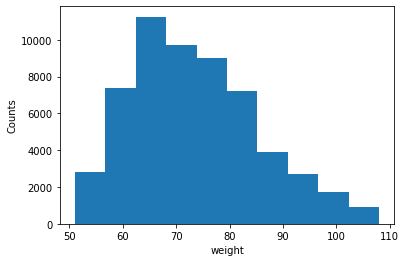

count    56640.000000
mean        73.538081
std         11.846841
min         51.000000
25%         65.000000
50%         72.000000
75%         81.000000
max        108.000000
Name: weight, dtype: float64


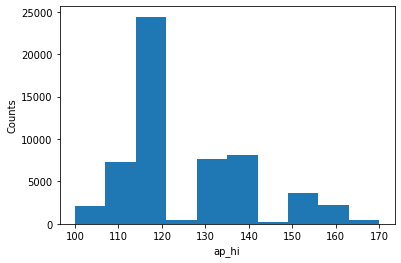

count    56640.000000
mean       126.209975
std         14.303756
min        100.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        170.000000
Name: ap_hi, dtype: float64


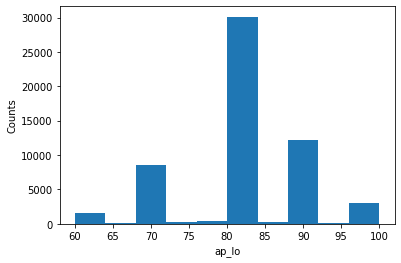

count    56640.000000
mean        81.181903
std          8.311987
min         60.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        100.000000
Name: ap_lo, dtype: float64
       age_year  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0            50       2     168    62.0    110     80            1     1   
1            55       1     156    85.0    140     90            3     1   
2            52       1     165    64.0    130     70            3     1   
3            48       2     169    82.0    150    100            1     1   
4            60       1     151    67.0    120     80            2     2   
...         ...     ...     ...     ...    ...    ...          ...   ...   
65594        54       1     172    70.0    130     90            1     1   
65595        58       1     165    80.0    150     80            1     1   
65596        53       2     168    76.0    120     80            1     1   
65599        61       1     163    7

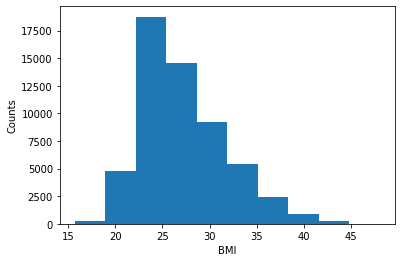

count    56640.000000
mean        27.219427
std          4.481989
min         15.740741
25%         23.875115
50%         26.259585
75%         29.761905
max         48.000000
Name: BMI, dtype: float64
       age_year  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0            50       2     168    62.0    110     80            1     1   
1            55       1     156    85.0    140     90            3     1   
2            52       1     165    64.0    130     70            3     1   
3            48       2     169    82.0    150    100            1     1   
4            60       1     151    67.0    120     80            2     2   
...         ...     ...     ...     ...    ...    ...          ...   ...   
65594        54       1     172    70.0    130     90            1     1   
65595        58       1     165    80.0    150     80            1     1   
65596        53       2     168    76.0    120     80            1     1   
65599        61       1     163    72.

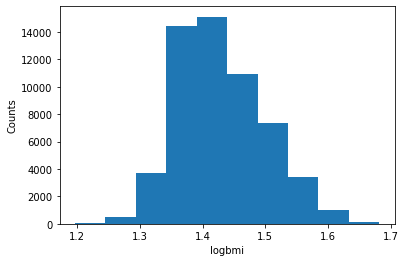

count    56640.000000
mean         1.429306
std          0.068790
min          1.197025
25%          1.377945
50%          1.419288
75%          1.473661
max          1.681241
Name: logbmi, dtype: float64
+--------+------+-----+-----+-----------+----+-----+----+------+------+------------------+------------------+------------------+
|age_year|gender|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|               BMI|              bmi1|            logbmi|
+--------+------+-----+-----+-----------+----+-----+----+------+------+------------------+------------------+------------------+
|      50|     2|  110|   80|          1|   1|    0|   0|     1|     0|  21.9671201814059|  21.9671201814059|1.3417731260465282|
|      55|     1|  140|   90|          3|   1|    0|   0|     1|     1|34.927679158448385|34.927679158448385|1.5431697290053694|
|      52|     1|  130|   70|          3|   1|    0|   0|     0|     1|23.507805325987146|23.507805325987146|1.3712120855560745|
|      48|     2|  15

+----------+------+--------------------+
|prediction|cardio|            features|
+----------+------+--------------------+
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   1.0|[100.0,60.0,40.0,...|
|       0.0|   1.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,70.0,40.0,...|
|       0.0|   0.0|[100.0,70.0,40.0,...|
+----------+------+--------------------+
only showing top 10 rows



Test Error = 0.280708
rf variable ranking
(10,[0,1,2,3,4,5,6,7,8,9],[0.5537359583028171,0.20477389314668187,0.0947528269609773,0.00041113155009299017,0.10866847264685861,0.002188066087099833,0.00016266680297870388,0.0009092860743456123,0.018586553899111985,0.015811144529035905])


+----------+------+--------------------+
|prediction|cardio|            features|
+----------+------+--------------------+
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
+----------+------+--------------------+
only showing top 5 rows

Test Error = 0.283236
dt variable ranking
(10,[0,1,2,4,5,7],[0.7934380315908587,0.005527198262790902,0.11303300157800202,0.07963375879534043,0.005638147862796844,0.002729861910211154])


+----------+------+--------------------+
|prediction|cardio|            features|
+----------+------+--------------------+
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
|       0.0|   0.0|[100.0,60.0,40.0,...|
+----------+------+--------------------+
only showing top 5 rows

Test Error = 0.278616
gbt variable ranking
(10,[0,1,2,3,4,5,6,7,8],[0.5749258802575313,0.028393174943530084,0.14444641233387454,0.009042296844017916,0.08473840016778887,0.016875662876656636,0.01884045376911164,0.047406725064219196,0.07533099374326974])
asdas
       age_year  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0            50       2    110     80            1     1      0     0       1   
1            55       1    140     90            3     1      0     0       1   
2            52       1    130     70            3     1      0     0       0   
3            48       2

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ModuleNotFoundError: No module named 'statsmodels'

In [16]:
import pandas
dfpandas=dfnoNA.toPandas()
dfpandas['age_year'] = dfpandas['age_year'].astype('int')

rslt_df = dfpandas[dfpandas['age_year'] < 100] 
print(rslt_df['age_year'])
#plt.hist(dfpandas.iloc[::,3])
plt.hist(rslt_df['age_year'])
plt.show()

plt.hist(dfpandas['ap_hi'])
plt.show()
plt.hist(dfpandas['ap_lo'])
plt.show()
plt.hist(dfpandas['height'])
plt.show()
plt.hist(dfpandas['weight'])
plt.show()


cols = ['age_year',"height","weight","ap_hi","ap_lo"]

Q1 = dfpandas[cols].quantile(0.025)
Q3 = dfpandas[cols].quantile(0.975)
DFwithoutoutlier = dfpandas[~((dfpandas[cols] < (Q1)) |(dfpandas[cols] > (Q3))).any(axis=1)]
print(DFwithoutoutlier)


plt.hist(DFwithoutoutlier.iloc[::,5])
plt.xlabel("height")
plt.ylabel("Counts")
plt.show()
print(DFwithoutoutlier.iloc[::,5].describe())


plt.hist(DFwithoutoutlier.iloc[::,6])
plt.xlabel("weight")
plt.ylabel("Counts")
plt.show()
print(DFwithoutoutlier.iloc[::,6].describe())



plt.hist(DFwithoutoutlier.iloc[::,7])
plt.xlabel("ap_hi")
plt.ylabel("Counts")
plt.show()
print(DFwithoutoutlier.iloc[::,7].describe())


plt.hist(DFwithoutoutlier.iloc[::,8])
plt.xlabel("ap_lo")
plt.ylabel("Counts")
plt.show()
print(DFwithoutoutlier.iloc[::,8].describe())


dfnoNAcol1=DFwithoutoutlier.drop(["age_days","_c0","id"],axis=1)
print(dfnoNAcol1)


dfnoNAcol1['BMI'] = dfnoNAcol1['weight'] / ((dfnoNAcol1['height']/100)*(dfnoNAcol1['height']/100))
print(dfnoNAcol1)

plt.hist(dfnoNAcol1.iloc[::,12])
plt.xlabel("BMI")
plt.ylabel("Counts")
plt.show()
print(dfnoNAcol1.iloc[::,12].describe())


print(dfnoNAcol1)



dfnoNAcol2=dfnoNAcol1.drop(["height","weight"],axis=1)
print(dfnoNAcol2)




import numpy
dfnoNAcol2['bmi1'] = dfnoNAcol2['BMI'].astype(float)
print(dfnoNAcol2.dtypes)
dfnoNAcol2['logbmi'] = numpy.log10(dfnoNAcol2['bmi1']) 
print(dfnoNAcol2)


plt.hist(dfnoNAcol2.iloc[::,12])
plt.xlabel("logbmi")
plt.ylabel("Counts")
plt.show()
print(dfnoNAcol2.iloc[::,12].describe())






from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SQLContext
from pyspark.ml import Pipeline
from pyspark.ml.classification import (RandomForestClassifier, GBTClassifier, DecisionTreeClassifier)


dfnoNAcol2.to_csv('./rfcsv.csv', sep=',', index=False)

#dfnoNAcol2list=dfnoNAcol2.values.tolist()


df3 = spark.read.option("header",True).csv("./rfcsv.csv")
df3.show()
df3.printSchema()
#String to double
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col

#df3.withColumn(['age_year','gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','BMI','bmi1','logbmi'],round(df.age_year.cast(DoubleType())))
#df3.printSchema()

    
df3=df3.withColumn("age_year",df3.age_year.cast(DoubleType()))
df3=df3.withColumn("gender",df3.gender.cast(DoubleType()))
df3=df3.withColumn("ap_hi",df3.ap_hi.cast(DoubleType()))
df3=df3.withColumn("ap_lo",df3.ap_lo.cast(DoubleType()))
df3=df3.withColumn("cholesterol",df3.cholesterol.cast(DoubleType()))
df3=df3.withColumn("gluc",df3.gluc.cast(DoubleType()))
df3=df3.withColumn("smoke",df3.smoke.cast(DoubleType()))
df3=df3.withColumn("alco",df3.alco.cast(DoubleType()))
df3=df3.withColumn("active",df3.active.cast(DoubleType()))
df3=df3.withColumn("cardio",df3.cardio.cast(DoubleType()))
df3=df3.withColumn("BMI",df3.BMI.cast(DoubleType()))
df3=df3.withColumn("bmi1",df3.bmi1.cast(DoubleType()))
df3=df3.withColumn("logbmi",df3.logbmi.cast(DoubleType()))
df3.printSchema()






from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler=VectorAssembler(
inputCols=['ap_hi','ap_lo',"age_year",'gender','cholesterol','gluc','alco','active','BMI','logbmi'],outputCol='features')

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline


rf=RandomForestRegressor(labelCol='cardio',featuresCol='features')


(trainingData, testData) = df3.randomSplit([0.8, 0.2])
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(labelCol="cardio", featuresCol="features", numTrees=20)

pip = Pipeline(stages=[assembler,rf])

rf_fit=pip.fit(trainingData)

predictions = rf_fit.transform(testData)

predictions.select('prediction','cardio','features').show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))



rfModel = rf_fit.stages[-1].featureImportances
print("rf variable ranking")
print(rfModel)  







from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.util import MLUtils


dt = DecisionTreeClassifier(labelCol="cardio", featuresCol="features")
pip2=Pipeline(stages=[assembler, dt])
model = pip2.fit(trainingData)
predictions = model.transform(testData)
predictions.select("prediction", "cardio", "features").show(5)
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print ("Test Error = %g" % (1.0 - accuracy))

treeModel = model.stages[-1].featureImportances

print("dt variable ranking")
print (treeModel)










from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


gbt = GBTClassifier(labelCol="cardio", featuresCol="features", maxIter=10)
pip3=Pipeline(stages=[assembler, gbt])
model = pip3.fit(trainingData)
predictions = model.transform(testData)
predictions.select("prediction", "cardio", "features").show(5)
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

gbtModel = model.stages[-1].featureImportances

print("gbt variable ranking")
print(gbtModel)




from sklearn.linear_model import LogisticRegression


from sklearn.datasets import load_iris
print("asdas")
print(dfnoNAcol2)
dfx = dfnoNAcol2[['ap_hi']]
dfy = dfnoNAcol2[['cardio']]
clf = LogisticRegression(random_state=0).fit(dfx, dfy)
print(clf.coef_, clf.intercept_)
print(clf)


dfnoNAcol2.to_csv('./spyder.csv', sep=',', index=False)



dfx = df[['ap_hi']]
dfy = df[['cardio']]

import statsmodels.api as sm
logit_model=sm.Logit(dfy,dfx.assign(intercept=1))
result=logit_model.fit()
print(result.summary())



dfx = df[['age_year']]
dfy = df[['cardio']]

import statsmodels.api as sm
logit_model=sm.Logit(dfy,dfx.assign(intercept=1))
result=logit_model.fit()
print(result.summary())

dfx = df[['ap_lo']]
dfy = df[['cardio']]

import statsmodels.api as sm
logit_model=sm.Logit(dfy,dfx.assign(intercept=1))
result=logit_model.fit()
print(result.summary())




dfx = df[['ap_lo','age_year','ap_hi']]
dfy = df[['cardio']]

import statsmodels.api as sm
logit_model=sm.Logit(dfy,dfx.assign(intercept=1))
result=logit_model.fit()
print(result.summary())







data1 = pd.read_csv("C:/Users/24616/Desktop/data1.csv")
data2 = pd.read_csv("C:/Users/24616/Desktop/data2.csv")
outer_merged = pd.merge(
     data1, data2, how="outer", on=['id','age_days','age_year',	'gender',
                                    'height','weight',	'ap_hi'	,'ap_lo',
                                    'cholesterol','gluc',
                                    'smoke','alco','active','cardio'
]
 )



